Learning Pytorch! Thank you to Daniel Bourke for his 25 hour long course!

In [69]:
import torch
import pickle
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as pyplot

print(torch.__version__)

2.4.0+cpu


Intro to tensors

In [70]:
scalar = torch.tensor(7)
scalar

tensor(7)

In [71]:
scalar.ndim

# Get tensor back as Python int

scalar.item()

7

In [72]:
# Testing dimensions

testten = torch.tensor([[1,2],
                        [4,5],
                        [7,8]])

# First shape number refers to outer square brackets, the second to the second outer, etc.
# Tensors cannot be jagged
testten.shape

torch.Size([3, 2])

TENSOR/MATRIX in UPPER CASE

variables and vectors in lower case

size and shape are same thing in pytorch

In [73]:
x = torch.arange(1.,10.) # Putting a dot at the end ensures the data type is float
print(x, x.dtype)
x_newdim = x.reshape(1,9)
print(x_newdim) # Notice the new bracket!
print(x.reshape(3,3)) # Reshape must have the total number of elements equal to the original.

tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]) torch.float32
tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]])
tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


In [74]:
z = x.view(1,9) # Changing anything in a view of a tensor, also changes the tensor.
print(z)

z[:,0] = 5

print(z,x)

tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]])
tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]) tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])


In [75]:
x_stackedh = torch.stack([x,x,x,x],dim=0)
print(x_stackedh)

x_stackedv = torch.stack([x,x,x,x],dim=1)
print(x_stackedv)

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])
tensor([[5., 5., 5., 5.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.],
        [8., 8., 8., 8.],
        [9., 9., 9., 9.]])


In [76]:
print(x_newdim.shape)

x_squeezed = torch.squeeze(x_newdim)

print(x_squeezed.shape)


torch.Size([1, 9])
torch.Size([9])


In [77]:
with open('data/event_dict.pkl', 'rb') as file:
    ev_dict = pickle.load(file)

print(ev_dict[0].keys())

event0 = torch.tensor(ev_dict[0]['data'])

event0.device

dict_keys(['mean_SNR', 'bin_time', 'data'])


device(type='cpu')

In [78]:
x_original = torch.rand(224,224,3)

x_original[0,0,0]

tensor(0.1348)

In [79]:
import torch
from torch import nn
# First Linear Regression Model

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1), requires_grad=True)
    def forward(self,x:torch.Tensor):
        return self.weights*x + self.bias
    
model_0 = LinearRegressionModel()

In [80]:
# Define variables:
X = torch.arange(0, 50, dtype=torch.float32)
weight = 0.7
bias = -1
y = weight*X + bias

# Create train/test sets:
X_train,y_train = X[:40],y[:40]
X_test,y_test = X[40:],y[40:]

model_0.state_dict()

OrderedDict([('weights', tensor([-1.0081])), ('bias', tensor([-0.5812]))])

In [81]:
# Inference mode allows you to look at the model without training it:
# Can also use torch.no_grad(), however inference mode is preferred.
with torch.inference_mode():
    y_pred = model(X)
    print(y_pred)
# Inference mode is called a context manager.

tensor([ 1.1150,  2.0968,  3.0786,  4.0604,  5.0421,  6.0239,  7.0057,  7.9875,
         8.9692,  9.9510, 10.9328, 11.9146, 12.8964, 13.8781, 14.8599, 15.8417,
        16.8235, 17.8052, 18.7870, 19.7688, 20.7506, 21.7323, 22.7141, 23.6959,
        24.6777, 25.6594, 26.6412, 27.6230, 28.6048, 29.5865, 30.5683, 31.5501,
        32.5319, 33.5136, 34.4954, 35.4772, 36.4590, 37.4408, 38.4225, 39.4043,
        40.3861, 41.3679, 42.3496, 43.3314, 44.3132, 45.2950, 46.2767, 47.2585,
        48.2403, 49.2221])


In [82]:
# We can use a loss function to measure the difference between the predicted and actual values.
# * Also called a criterion
# * Also called a cost function

# The mean absolute error is a common loss function for regression problems. In PyTorch, it is implemented as the L1Loss class.
# Setup a loss function:

loss_fn = nn.L1Loss()

# Stochastic Gradient Descent is a common optimizer for training deep learning models. In PyTorch, it is implemented as the SGD class.
# Setup an optimizer:

optimizer = torch.optim.SGD(model_0.parameters(), lr=0.001) # lr is the learning rate.

In [87]:
# Training loop:

# An epoch is one loop through the data.
epochs = 200

# For storing model performance:
epoch_count = []
loss_values = []
test_loss_values = []

# Step 0: Loop through the data

for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # 

    # Step 1: Forward pass
    y_pred = model_0(X_train)

    # Step 2: Calculate loss

    loss = loss_fn(y_pred, y_train)

    # Step 3: Zero gradients. We need to do this after optimizer.step() because PyTorch accumulates gradients on subsequent backward passes.
    optimizer.zero_grad()

    # Step 4: Perform backpropagation on the loss with respect to the parameters of the model.
    loss.backward()

    # Step 5: Step the optimizer (perform gradient descent)
    optimizer.step()

    # Testing:
    model_0.eval()
    with torch.inference_mode():
        # Step 1: Forward pass
        test_pred = model_0(X_test)
        # Step 2: Calculate loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f'Epoch: {epoch}, Training Loss: {loss.item()}, Test Loss: {test_loss.item()}')





Epoch: 0, Training Loss: 0.2050286829471588, Test Loss: 0.5928424596786499
Epoch: 10, Training Loss: 0.1971002072095871, Test Loss: 0.4763418138027191
Epoch: 20, Training Loss: 0.2004636824131012, Test Loss: 0.5201879739761353
Epoch: 30, Training Loss: 0.19741162657737732, Test Loss: 0.5261598825454712
Epoch: 40, Training Loss: 0.19695934653282166, Test Loss: 0.5187339782714844
Epoch: 50, Training Loss: 0.19774363934993744, Test Loss: 0.5825079083442688
Epoch: 60, Training Loss: 0.19099512696266174, Test Loss: 0.5304784774780273
Epoch: 70, Training Loss: 0.20353534817695618, Test Loss: 0.7055025100708008
Epoch: 80, Training Loss: 0.20645208656787872, Test Loss: 0.7736232876777649
Epoch: 90, Training Loss: 0.2002609521150589, Test Loss: 0.7037029266357422
Epoch: 100, Training Loss: 0.19218137860298157, Test Loss: 0.6449030041694641
Epoch: 110, Training Loss: 0.17935019731521606, Test Loss: 0.4056764543056488
Epoch: 120, Training Loss: 0.1829603612422943, Test Loss: 0.5161272287368774
Ep

In [88]:
loss_values

[tensor(0.2050, grad_fn=<MeanBackward0>),
 tensor(0.1971, grad_fn=<MeanBackward0>),
 tensor(0.2005, grad_fn=<MeanBackward0>),
 tensor(0.1974, grad_fn=<MeanBackward0>),
 tensor(0.1970, grad_fn=<MeanBackward0>),
 tensor(0.1977, grad_fn=<MeanBackward0>),
 tensor(0.1910, grad_fn=<MeanBackward0>),
 tensor(0.2035, grad_fn=<MeanBackward0>),
 tensor(0.2065, grad_fn=<MeanBackward0>),
 tensor(0.2003, grad_fn=<MeanBackward0>),
 tensor(0.1922, grad_fn=<MeanBackward0>),
 tensor(0.1794, grad_fn=<MeanBackward0>),
 tensor(0.1830, grad_fn=<MeanBackward0>),
 tensor(0.1856, grad_fn=<MeanBackward0>),
 tensor(0.1881, grad_fn=<MeanBackward0>),
 tensor(0.1959, grad_fn=<MeanBackward0>),
 tensor(0.1750, grad_fn=<MeanBackward0>),
 tensor(0.1822, grad_fn=<MeanBackward0>),
 tensor(0.1811, grad_fn=<MeanBackward0>),
 tensor(0.1799, grad_fn=<MeanBackward0>)]

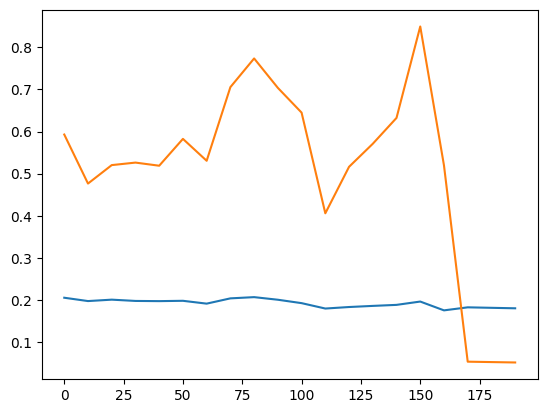

In [95]:
import matplotlib.pyplot as plt
list(model_0.parameters())

plt.plot(epoch_count, torch.tensor(loss_values).numpy(), label='Training Loss')
plt.plot(epoch_count, torch.tensor(test_loss_values).numpy(), label='Test Loss')

In [99]:
# For saving the model:
from pathlib import Path # Interesting python library to handle file paths.

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(exist_ok=True,parents=True)

MODEL_NAME = '01_linear_regression_model.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

In [101]:
# To load model:

model_0b = LinearRegressionModel()
model_0b.load_state_dict(torch.load(MODEL_SAVE_PATH))

/tmp/ipykernel_12637/3027852325.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_0b.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

### Putting it all together!

In [183]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

torch.cuda.is_available() # ISSUE!

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [184]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias 
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [185]:
# Split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

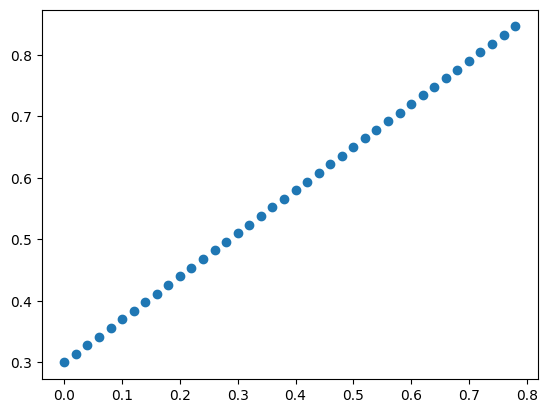

In [186]:
# Plot the data

plt.scatter(X_train, y_train, label='Training Data')

In [190]:
# Build linear model:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_v2 = LinearRegressionModelV2()

model_v2.state_dict() 

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [191]:
next(model_v2.parameters()).device
model_v2.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [192]:
# Create loss function
loss_fn = nn.L1Loss()

# Create optimizer
optimizer = torch.optim.SGD(params=model_v2.parameters(), # optimize newly created model's parameters
                            lr=0.01)

In [198]:
torch.manual_seed(42)

# Set the number of epochs 
epochs = 200

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_v2.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_v2(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_v2.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_v2(X_test)
    
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 10 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 20 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 30 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 40 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 50 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 60 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 70 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 80 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 90 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 100 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 110 | Train loss: 0.0012645035749301314 | Test loss: 0.013801807537674904
Epoch: 120 | Train loss: 0.001264503574

In [194]:
model_v2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

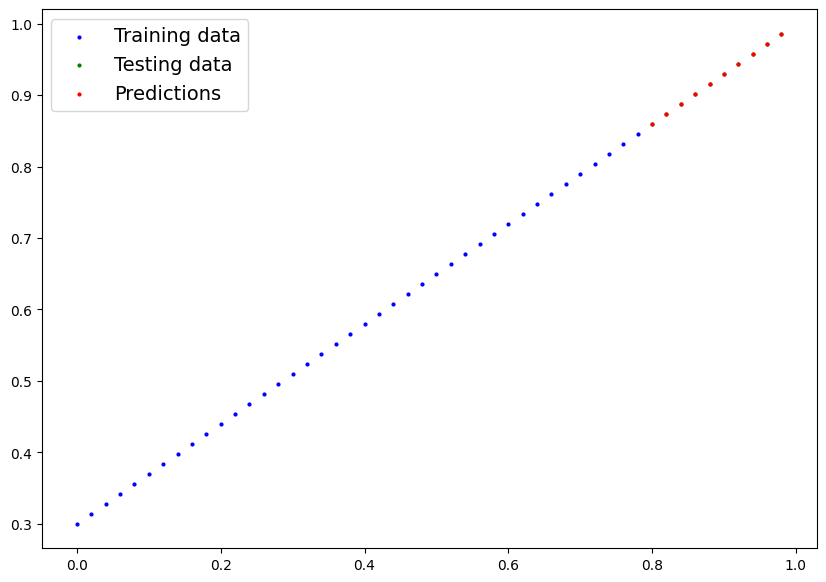

In [202]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

with torch.inference_mode():
  y_preds = model_v2(X_test)

plot_predictions(predictions=y_preds.cpu())

In [206]:
MODEL_NAME = '01_linear_regression_modelv2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
torch.save(obj=model_v2.state_dict(),f=MODEL_SAVE_PATH)

loaded_model_V2 = LinearRegressionModelV2()
loaded_model_V2.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_V2.to(device)

# Evaluate:

loaded_model_V2.eval()
with torch.inference_mode():
    loaded_model_V2_preds = loaded_model_V2(X_test)
y_preds == loaded_model_V2_preds

/tmp/ipykernel_12637/482805765.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_V2.load_state_dict(torch.load(MODEL_SAVE_PATH))


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])